In [ ]:
#Extract reviews of any product from ecommerce website like amazon


In [ ]:
# importing libraries

In [7]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs

from flask import Response
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [8]:
iphone_review=[]

In [9]:
for i in range(1,100):
    op= []
    url = "https://www.amazon.in/Apple-iPhone-14-128GB-Blue/product-reviews/B0BDK62PDX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    responce = requests.get(url)
    soup = bs(responce.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    iphone_review = iphone_review+op


In [13]:
iphone_review = list(set(iphone_review))
iphone_review

['The media could not be loaded.\n                \n\n\n\n\xa0Wanted 2 buy iPhone 14pro or max as the picture displayed like similar when you compare iPhone with pro and max. Hence it is Amazon who should have given me an options for various colors while loading and to choose from its 14 series..late uploaded though as I bought it as on sep 24th 2022.In regards the phone it is just like a cream in your hand , immensely smooth and the performance is at par. I would rate the rear camera A++ however they should have offered the charger at least along with cable.',
 'About the phoneApple phone without a second delay, I would say it is better than all android phones I have used. The phone is like water, it flows in a way you want and shaping in your way. In a best way possible, the phone is designed to only show what the user wants and eliminating unnecessary ads, features that I have seen in android.Why it is better than Android?You pay too much money for Apple products, obviously you expe

In [14]:
iphone_review=[Text.strip() for Text in iphone_review] 
iphone_review=[Text for Text in iphone_review if Text] # removes empty strings.
iphone_review[0:10]

['The media could not be loaded.\n                \n\n\n\n\xa0Wanted 2 buy iPhone 14pro or max as the picture displayed like similar when you compare iPhone with pro and max. Hence it is Amazon who should have given me an options for various colors while loading and to choose from its 14 series..late uploaded though as I bought it as on sep 24th 2022.In regards the phone it is just like a cream in your hand , immensely smooth and the performance is at par. I would rate the rear camera A++ however they should have offered the charger at least along with cable.',
 'About the phoneApple phone without a second delay, I would say it is better than all android phones I have used. The phone is like water, it flows in a way you want and shaping in your way. In a best way possible, the phone is designed to only show what the user wants and eliminating unnecessary ads, features that I have seen in android.Why it is better than Android?You pay too much money for Apple products, obviously you expe

In [18]:
# Joining the list into one string/text
reviews_text=' '.join(iphone_review)
reviews_text


'The media could not be loaded.\n                \n\n\n\n\xa0Wanted 2 buy iPhone 14pro or max as the picture displayed like similar when you compare iPhone with pro and max. Hence it is Amazon who should have given me an options for various colors while loading and to choose from its 14 series..late uploaded though as I bought it as on sep 24th 2022.In regards the phone it is just like a cream in your hand , immensely smooth and the performance is at par. I would rate the rear camera A++ however they should have offered the charger at least along with cable. About the phoneApple phone without a second delay, I would say it is better than all android phones I have used. The phone is like water, it flows in a way you want and shaping in your way. In a best way possible, the phone is designed to only show what the user wants and eliminating unnecessary ads, features that I have seen in android.Why it is better than Android?You pay too much money for Apple products, obviously you experienc

In [19]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'The media could not be loaded\n                \n\n\n\n\xa0Wanted 2 buy iPhone 14pro or max as the picture displayed like similar when you compare iPhone with pro and max Hence it is Amazon who should have given me an options for various colors while loading and to choose from its 14 serieslate uploaded though as I bought it as on sep 24th 2022In regards the phone it is just like a cream in your hand  immensely smooth and the performance is at par I would rate the rear camera A however they should have offered the charger at least along with cable About the phoneApple phone without a second delay I would say it is better than all android phones I have used The phone is like water it flows in a way you want and shaping in your way In a best way possible the phone is designed to only show what the user wants and eliminating unnecessary ads features that I have seen in androidWhy it is better than AndroidYou pay too much money for Apple products obviously you experience the features phys

In [20]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\berri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\berri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['The', 'media', 'could', 'not', 'be', 'loaded', 'Wanted', '2', 'buy', 'iPhone', '14pro', 'or', 'max', 'as', 'the', 'picture', 'displayed', 'like', 'similar', 'when', 'you', 'compare', 'iPhone', 'with', 'pro', 'and', 'max', 'Hence', 'it', 'is', 'Amazon', 'who', 'should', 'have', 'given', 'me', 'an', 'options', 'for', 'various', 'colors', 'while', 'loading', 'and', 'to', 'choose', 'from', 'its', '14', 'serieslate']


In [22]:
len(text_tokens)

810

In [23]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['media', 'could', 'loaded', 'Wanted', '2', 'buy', 'iPhone', '14pro', 'max', 'picture', 'displayed', 'like', 'similar', 'compare', 'iPhone', 'pro', 'max', 'Hence', 'Amazon', 'given', 'options', 'various', 'colors', 'loading', 'choose', '14', 'serieslate', 'uploaded', 'though', 'bought', 'sep', '24th', '2022In', 'regards', 'phone', 'like', 'cream', 'hand', 'immensely', 'smooth', 'performance', 'par', 'would', 'rate', 'rear', 'camera', 'however', 'offered', 'charger', 'least', 'along', 'cable', 'About', 'phoneApple', 'phone', 'without', 'second', 'delay', 'would', 'say', 'better', 'android', 'phones', 'used', 'phone', 'like', 'water', 'flows', 'way', 'want', 'shaping', 'way', 'In', 'best', 'way', 'possible', 'phone', 'designed', 'show', 'user', 'wants', 'eliminating', 'unnecessary', 'ads', 'features', 'seen', 'androidWhy', 'better', 'AndroidYou', 'pay', 'much', 'money', 'Apple', 'products', 'obviously', 'experience', 'features', 'physical', 'components', 'camera', 'lens', 'etc', 'Apart',

In [24]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['media', 'could', 'loaded', 'wanted', '2', 'buy', 'iphone', '14pro', 'max', 'picture', 'displayed', 'like', 'similar', 'compare', 'iphone', 'pro', 'max', 'hence', 'amazon', 'given', 'options', 'various', 'colors', 'loading', 'choose', '14', 'serieslate', 'uploaded', 'though', 'bought', 'sep', '24th', '2022in', 'regards', 'phone', 'like', 'cream', 'hand', 'immensely', 'smooth', 'performance', 'par', 'would', 'rate', 'rear', 'camera', 'however', 'offered', 'charger', 'least', 'along', 'cable', 'about', 'phoneapple', 'phone', 'without', 'second', 'delay', 'would', 'say', 'better', 'android', 'phones', 'used', 'phone', 'like', 'water', 'flows', 'way', 'want', 'shaping', 'way', 'in', 'best', 'way', 'possible', 'phone', 'designed', 'show', 'user', 'wants', 'eliminating', 'unnecessary', 'ads', 'features', 'seen', 'androidwhy', 'better', 'androidyou', 'pay', 'much', 'money', 'apple', 'products', 'obviously', 'experience', 'features', 'physical', 'components', 'camera', 'lens', 'etc', 'apart',

In [25]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['media', 'could', 'load', 'want', '2', 'buy', 'iphon', '14pro', 'max', 'pictur', 'display', 'like', 'similar', 'compar', 'iphon', 'pro', 'max', 'henc', 'amazon', 'given', 'option', 'variou', 'color', 'load', 'choos', '14', 'seriesl', 'upload', 'though', 'bought', 'sep', '24th', '2022in', 'regard', 'phone', 'like', 'cream', 'hand', 'immens', 'smooth', 'perform', 'par', 'would', 'rate', 'rear', 'camera', 'howev', 'offer', 'charger', 'least', 'along', 'cabl', 'about', 'phoneappl', 'phone', 'without', 'second', 'delay', 'would', 'say', 'better', 'android', 'phone', 'use', 'phone', 'like', 'water', 'flow', 'way', 'want', 'shape', 'way', 'in', 'best', 'way', 'possibl', 'phone', 'design', 'show', 'user', 'want', 'elimin', 'unnecessari', 'ad', 'featur', 'seen', 'androidwhi', 'better', 'androidy', 'pay', 'much', 'money', 'appl', 'product', 'obvious', 'experi', 'featur', 'physic', 'compon', 'camera', 'len', 'etc', 'apart', 'basic', 'thing', 'also', 'enjoy', 'best', 'applic', 'avail', 'app', 'st

In [26]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

media could loaded wanted 2 buy iphone 14pro max picture displayed like similar compare iphone pro max hence amazon given options various colors loading choose 14 serieslate uploaded though bought sep 24th 2022in regards phone like cream hand immensely smooth performance par would rate rear camera however offered charger least along cable about phoneapple phone without second delay would say better android phones used phone like water flows way want shaping way in best way possible phone designed show user wants eliminating unnecessary ads features seen androidwhy better androidyou pay much money apple products obviously experience features physical components camera lens etc apart basic things also enjoy best applications available app store if developer might know app store policy application publish security posture towards handling payment apps etc they publish best application way apps modules switches flawless due called strict policy privacy program apple products iphone pop box

In [27]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['medium', 'could', 'load', 'want', '2', 'buy', 'iphone', '14pro', 'max', 'picture', 'display', 'like', 'similar', 'compare', 'iphone', 'pro', 'max', 'hence', 'amazon', 'give', 'option', 'various', 'color', 'load', 'choose', '14', 'serieslate', 'upload', 'though', 'buy', 'sep', '24th', '2022', 'in', 'regard', 'phone', 'like', 'cream', 'hand', 'immensely', 'smooth', 'performance', 'par', 'would', 'rate', 'rear', 'camera', 'however', 'offer', 'charger', 'least', 'along', 'cable', 'about', 'phoneapple', 'phone', 'without', 'second', 'delay', 'would', 'say', 'well', 'android', 'phone', 'use', 'phone', 'like', 'water', 'flow', 'way', 'want', 'shape', 'way', 'in', 'good', 'way', 'possible', 'phone', 'design', 'show', 'user', 'want', 'eliminate', 'unnecessary', 'ad', 'feature', 'see', 'androidwhy', 'well', 'androidyou', 'pay', 'much', 'money', 'apple', 'product', 'obviously', 'experience', 'feature', 'physical', 'component', 'camera', 'lens', 'etc', 'apart', 'basic', 'thing', 'also', 'enjoy',

In [28]:
clean_reviews=' '.join(lemmas)
clean_reviews

'medium could load want 2 buy iphone 14pro max picture display like similar compare iphone pro max hence amazon give option various color load choose 14 serieslate upload though buy sep 24th 2022 in regard phone like cream hand immensely smooth performance par would rate rear camera however offer charger least along cable about phoneapple phone without second delay would say well android phone use phone like water flow way want shape way in good way possible phone design show user want eliminate unnecessary ad feature see androidwhy well androidyou pay much money apple product obviously experience feature physical component camera lens etc apart basic thing also enjoy good application available app store if developer might know app store policy application publish security posture towards handle payment app etc they publish good application way app module switch flawless due call strict policy privacy program apple product iphone pop box screen app want track activity application 1 res

In [29]:
#Using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [30]:
print(cv.vocabulary_)

{'medium': 159, 'could': 74, 'load': 152, 'want': 293, 'buy': 48, 'iphone': 143, '14pro': 5, 'max': 157, 'picture': 193, 'display': 86, 'like': 151, 'similar': 245, 'compare': 68, 'pro': 209, 'hence': 131, 'amazon': 20, 'give': 118, 'option': 179, 'various': 288, 'color': 65, 'choose': 63, '14': 4, 'serieslate': 240, 'upload': 283, 'though': 266, 'sep': 239, '24th': 8, '2022': 7, 'in': 137, 'regard': 222, 'phone': 189, 'cream': 75, 'hand': 126, 'immensely': 136, 'smooth': 248, 'performance': 188, 'par': 183, 'would': 304, 'rate': 216, 'rear': 219, 'camera': 52, 'however': 132, 'offer': 176, 'charger': 60, 'least': 149, 'along': 17, 'cable': 50, 'about': 10, 'phoneapple': 190, 'without': 299, 'second': 234, 'delay': 78, 'say': 231, 'well': 297, 'android': 22, 'use': 285, 'water': 295, 'flow': 112, 'way': 296, 'shape': 241, 'good': 122, 'possible': 198, 'design': 80, 'show': 242, 'user': 286, 'eliminate': 90, 'unnecessary': 281, 'ad': 13, 'feature': 106, 'see': 236, 'androidwhy': 23, 'an

In [31]:
print(reviewscv.toarray()[150:300])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [32]:
print(reviewscv.toarray().shape)

(482, 308)


In [ ]:
#ngram

In [33]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [34]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['13', '14', 'add', 'also', 'amazon', 'app', 'apple', 'application', 'back', 'battery', 'blue', 'business', 'but', 'buy', 'camera', 'case', 'change', 'charger', 'colour', 'come', 'component', 'could', 'delivery', 'design', 'due', 'edition', 'etc', 'even', 'exchange', 'expensive', 'experience', 'extra', 'feature', 'find', 'friendly', 'give', 'go', 'good', 'great', 'he', 'if', 'imei', 'in', 'iphone', 'least', 'lens', 'like', 'load', 'look', 'love', 'make', 'max', 'may', 'medium', 'model', 'much', 'old', 'option', 'part', 'pay', 'payment', 'perfect', 'performance', 'phone', 'physical', 'policy', 'practice', 'pre', 'premium', 'pricefile', 'product', 'publish', 'quality', 'rare', 'rate', 'real', 'really', 'rear', 'reason', 'red', 'say', 'screen', 'show', 'smooth', 'store', 'strict', 'temper', 'thing', 'track', 'upgrade', 'use', 'vs', 'wait', 'want', 'way', 'well', 'work', 'worksoverall', 'would', 'wrong']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0

C:\Users\berri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [35]:
#tf-idfv

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [37]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10k', '11', '11th', '13', '14', '14pro', '14the', '2022', '24th', '7k', 'about', 'accept', 'activity', 'ad', 'add', 'additional', 'almost', 'along', 'already', 'also', 'amazon', 'amount', 'android', 'androidwhy', 'androidyou', 'anti', 'any1', 'apart', 'app', 'apple', 'application', 'appwindow', 'available', 'average', 'awesome', 'back', 'basic', 'battery', 'beautiful', 'because', 'betterconsaverage', 'blue', 'bluetooth', 'box', 'browsersafe', 'build', 'business', 'but', 'buy', 'buying', 'cable', 'call', 'camera', 'carbon', 'card', 'care', 'carei', 'case', 'caseapple', 'change', 'charger', 'cheap', 'check', 'choose', 'claim', 'color', 'colour', 'come', 'compare', 'comparison', 'component', 'concern', 'corporate', 'cost', 'could', 'cream', 'customer', 'daily', 'delay', 'delivery', 'design', 'determined', 'developer', 'difference', 'different', 'disasteramazon', 'display', 'do', 'due', 'edition', 'eliminate', 'end', 'enjoy', 'enter', 'etc', 'even', 'excellent', 'except', 'exchange', 'ex

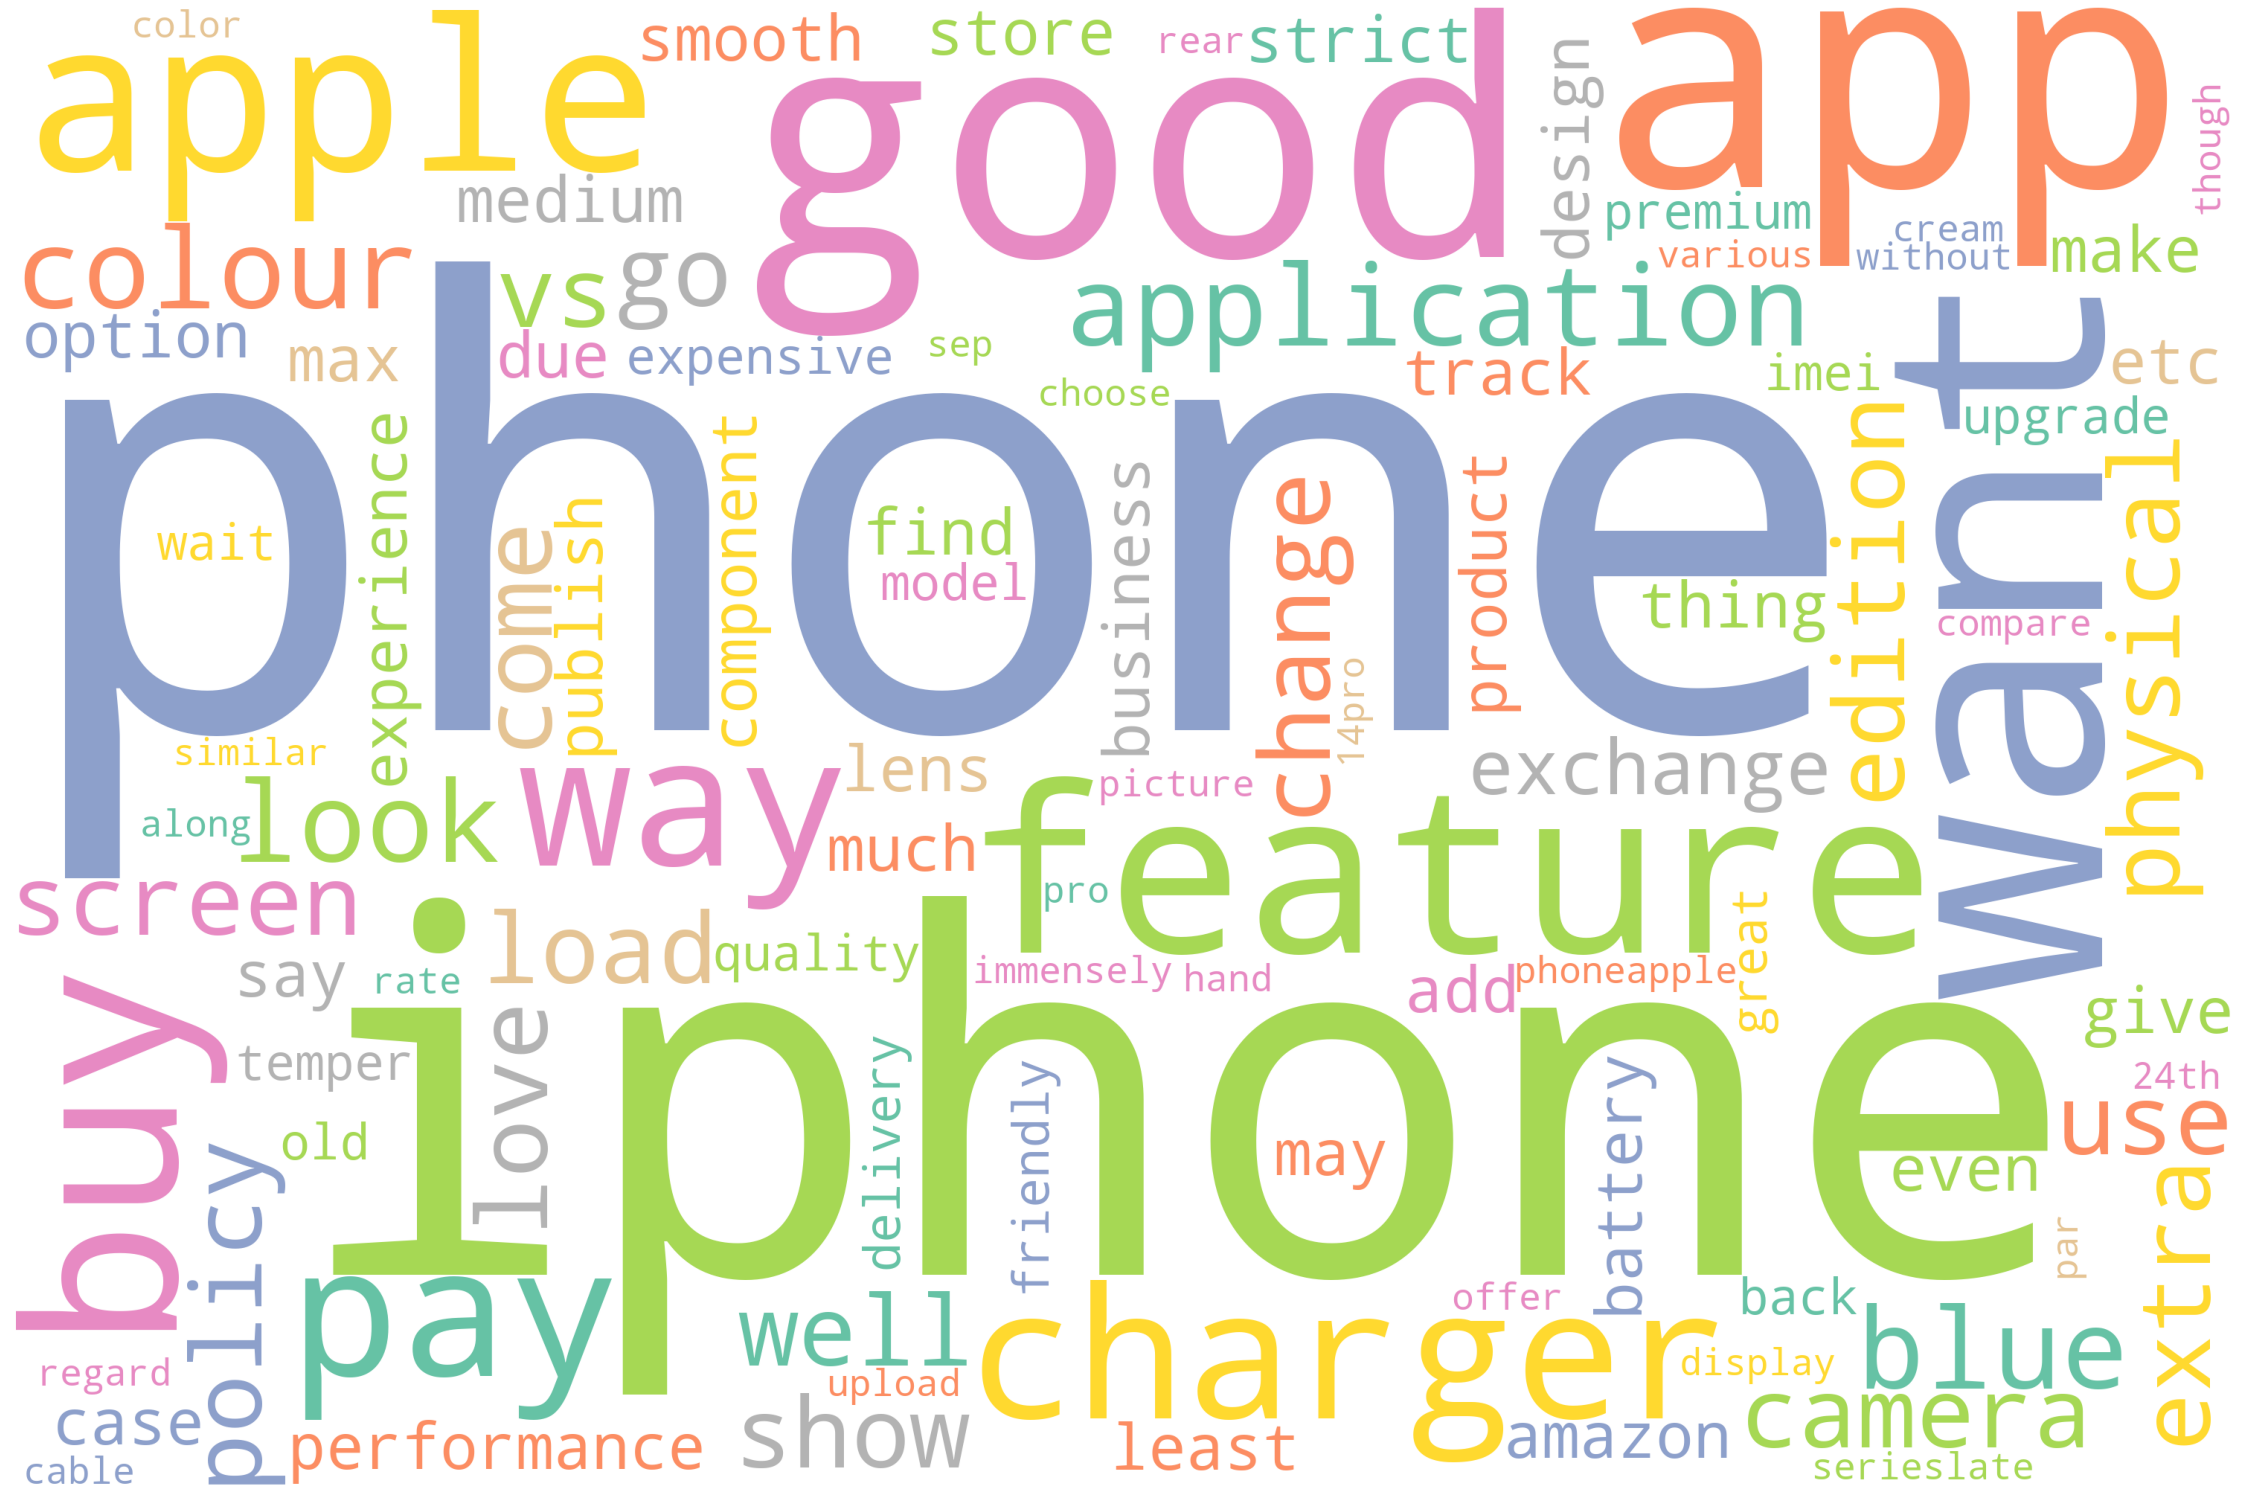

In [38]:
#Generate Word Cloud
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

In [39]:
#Named Entity Recognition (NER)
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [40]:
for token in doc_block[100:200]:
    print(token,token.pos_)

camera NOUN
lens NOUN
etc X
apart ADP
basic ADJ
thing NOUN
also ADV
enjoy VERB
good ADJ
application NOUN
available ADJ
app NOUN
store NOUN
if SCONJ
developer NOUN
might AUX
know VERB
app NOUN
store NOUN
policy NOUN
application NOUN
publish VERB
security NOUN
posture NOUN
towards AUX
handle VERB
payment NOUN
app NOUN
etc X
they PRON
publish VERB
good ADJ
application NOUN
way NOUN
app NOUN
module NOUN
switch NOUN
flawless NOUN
due ADJ
call VERB
strict ADJ
policy NOUN
privacy NOUN
program NOUN
apple NOUN
product NOUN
iphone NOUN
pop NOUN
box NOUN
screen NOUN
app PROPN
want VERB
track NOUN
activity NOUN
application NOUN
1 NUM
respect NOUN
apple NOUN
show NOUN
concern NOUN
userapple ADJ
phone NOUN
like ADP
13 NUM
vs ADP
14the ADJ
reason NOUN
14 NUM
13 NUM
may AUX
business NOUN
practice NOUN
follow VERB
11th ADJ
edition NOUN
but CCONJ
please INTJ
note VERB
iphone NOUN
make VERB
change NOUN
internally ADV
like ADP
physical ADJ
component NOUN
small ADJ
change NOUN
battery NOUN
performance NOUN

In [41]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])


['show', 'concern', 'phone', 'reason', 'business', 'practice', 'follow', 'edition', 'note', 'iphone', 'make', 'change', 'component', 'change', 'battery', 'performance', 'lens', 'edition', 'feature', 'buy', 'edition', 'find', 'change', 'go', 'camera', 'comparison', 'get', 'add', 'feature', 'use', 'feature', 'time', 'use', 'case', 'part', 'cost', 'price', 'give', 'charger', 'silicon', 'case', 'touch', 'scratch', 'silk', 'layer', 'issue', 'buy', 'charger', 'come', 'usb', 'c', 'claim', 'help', 'carbon', 'footprint', 'customer', 'business', 'model', 'purchase', 'spend', 'charger', 'caseapple', 'carei', 'buying', 'pay', 'phone', 'premium', 'apple', 'care', 'policy', 'understand', 'waste', 'find', 'insurance', 'make', 'thing', 'medium', 'load', 'phone', 'feature', 'colour', 'go', 'opinion', 'grab', 'thank', 'youamazon', 'love', 'love', 'phone', 'build', 'quality', 'premium', 'look', 'battery', 'job', 'upgrade', 'come', 'iphone', 'model', 'apple']


In [42]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,13
1,iphone,8
2,feature,6
3,app,6
4,want,5
5,buy,5
6,apple,5
7,charger,4
8,way,4
9,pay,4


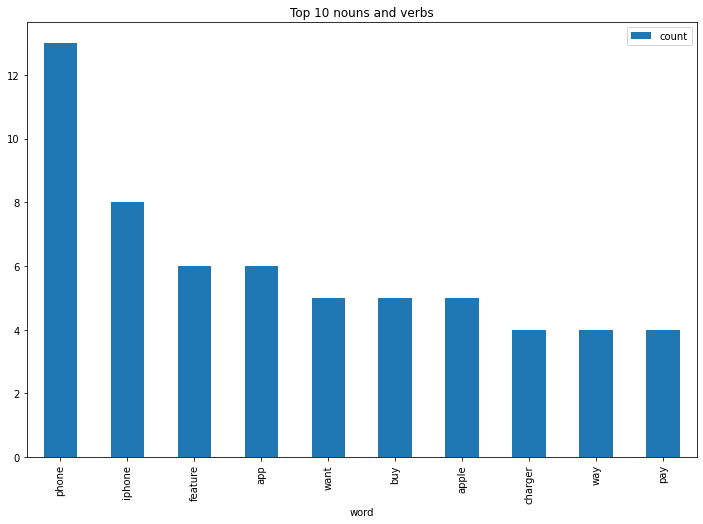

In [43]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');


In [61]:
#Emotion Mining - Sentiment Analysis


In [62]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(iphone_review))
sentences

['The media could not be loaded.',
 'Wanted 2 buy iPhone 14pro or max as the picture displayed like similar when you compare iPhone with pro and max.',
 'Hence it is Amazon who should have given me an options for various colors while loading and to choose from its 14 series..late uploaded though as I bought it as on sep 24th 2022.In regards the phone it is just like a cream in your hand , immensely smooth and the performance is at par.',
 'I would rate the rear camera A++ however they should have offered the charger at least along with cable.',
 'About the phoneApple phone without a second delay, I would say it is better than all android phones I have used.',
 'The phone is like water, it flows in a way you want and shaping in your way.',
 'In a best way possible, the phone is designed to only show what the user wants and eliminating unnecessary ads, features that I have seen in android.Why it is better than Android?You pay too much money for Apple products, obviously you experience th

In [63]:
#Emotion Mining - Sentiment Analysis


In [65]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(iphone_review))
sentences

['The media could not be loaded.',
 'Wanted 2 buy iPhone 14pro or max as the picture displayed like similar when you compare iPhone with pro and max.',
 'Hence it is Amazon who should have given me an options for various colors while loading and to choose from its 14 series..late uploaded though as I bought it as on sep 24th 2022.In regards the phone it is just like a cream in your hand , immensely smooth and the performance is at par.',
 'I would rate the rear camera A++ however they should have offered the charger at least along with cable.',
 'About the phoneApple phone without a second delay, I would say it is better than all android phones I have used.',
 'The phone is like water, it flows in a way you want and shaping in your way.',
 'In a best way possible, the phone is designed to only show what the user wants and eliminating unnecessary ads, features that I have seen in android.Why it is better than Android?You pay too much money for Apple products, obviously you experience th

In [66]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,The media could not be loaded.
1,Wanted 2 buy iPhone 14pro or max as the pictur...
2,Hence it is Amazon who should have given me an...
3,I would rate the rear camera A++ however they ...
4,About the phoneApple phone without a second de...
5,"The phone is like water, it flows in a way you..."
6,"In a best way possible, the phone is designed ..."
7,"Apart from basic things, you can also enjoy th..."
8,If you are a developer you might know the app ...
9,They publish best application and the way the ...


In [68]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [69]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [71]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [72]:
# manual testing
calculate_sentiment(text='good service')

3

In [73]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      3
2      2
3      0
4     -1
5      3
6      3
7      5
8      0
9      3
10     1
11     0
12     2
13     3
14     2
15     0
16     0
17     7
18     0
19     4
20     2
21     0
22     0
23     3
24     4
25     0
26    14
27     2
28     3
29    10
30    10
31     3
32     4
33    -2
34     0
35     6
Name: sentiment_value, dtype: int64

In [74]:
sent_df.sort_values(by='sentiment_value')


,sentence,sentiment_value
33,He entered incorrect IMEI number of my phone i...,-2
4,About the phoneApple phone without a second de...,-1
0,The media could not be loaded.,0
25,Don't go for opinion just grab it.,0
22,The media could not be loaded.,0
21,Instead I find a private insurance to make thi...,0
18,This is an issue for sure.,0
34,He wanted to pay the difference or return deli...,0
16,Also you get 13 for cheap :)14 is just added f...,0
11,+1 respect for apple to show such concern with...,0


In [75]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    36.000000
mean      2.666667
std       3.363671
min      -2.000000
25%       0.000000
50%       2.000000
75%       3.250000
max      14.000000
Name: sentiment_value, dtype: float64

In [76]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value
0,The media could not be loaded.,0
3,I would rate the rear camera A++ however they ...,0
4,About the phoneApple phone without a second de...,-1
8,If you are a developer you might know the app ...,0
11,+1 respect for apple to show such concern with...,0
15,Because physical and even cameras are not visu...,0
16,Also you get 13 for cheap :)14 is just added f...,0
18,This is an issue for sure.,0
21,Instead I find a private insurance to make thi...,0
22,The media could not be loaded.,0


In [77]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>=0]

,sentence,sentiment_value
0,The media could not be loaded.,0
1,Wanted 2 buy iPhone 14pro or max as the pictur...,3
2,Hence it is Amazon who should have given me an...,2
3,I would rate the rear camera A++ however they ...,0
5,"The phone is like water, it flows in a way you...",3
6,"In a best way possible, the phone is designed ...",3
7,"Apart from basic things, you can also enjoy th...",5
8,If you are a developer you might know the app ...,0
9,They publish best application and the way the ...,3
10,Due to the so called strict policy of privacy ...,1


In [78]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df


,sentence,sentiment_value,index
0,The media could not be loaded.,0,0
1,Wanted 2 buy iPhone 14pro or max as the pictur...,3,1
2,Hence it is Amazon who should have given me an...,2,2
3,I would rate the rear camera A++ however they ...,0,3
4,About the phoneApple phone without a second de...,-1,4
5,"The phone is like water, it flows in a way you...",3,5
6,"In a best way possible, the phone is designed ...",3,6
7,"Apart from basic things, you can also enjoy th...",5,7
8,If you are a developer you might know the app ...,0,8
9,They publish best application and the way the ...,3,9


C:\Users\berri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

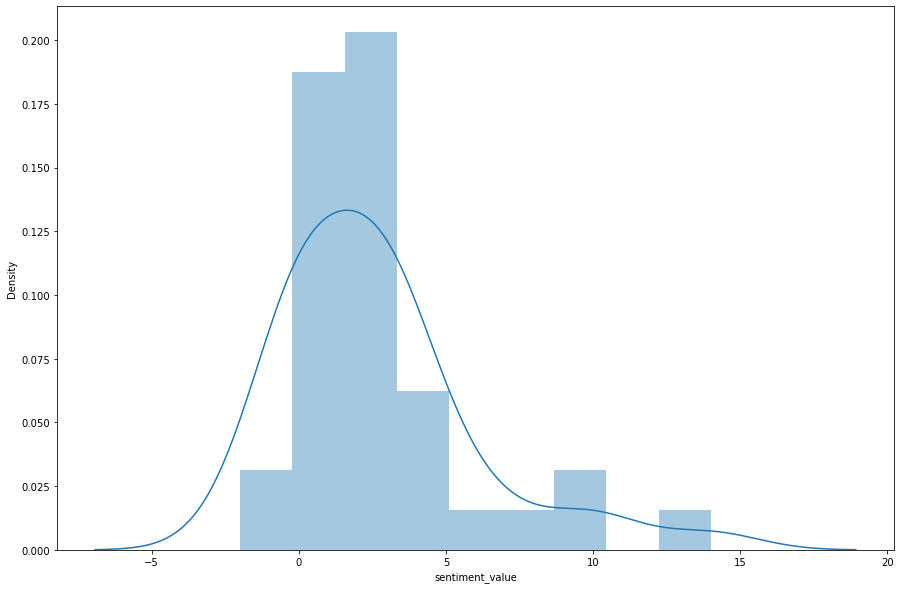

In [79]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

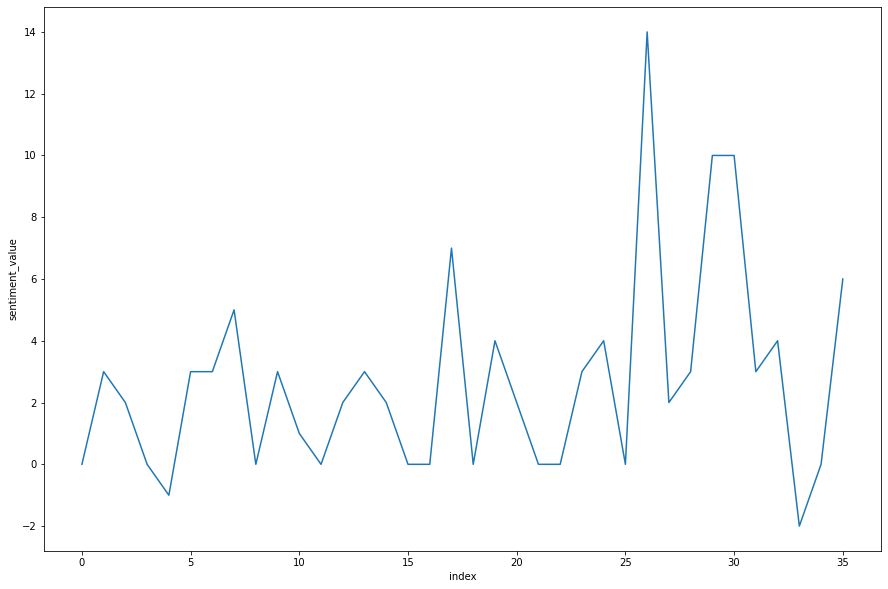

In [80]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)